In [1]:
import sys
sys.path.append('..')
import numpy as np
from produce_maps.tcrit import Tcrit_map, data_both_biomes
import matplotlib.pyplot as plt
from utils import dense_vegetation, sl_tropics, version, DATA_PATH
from matplotlib.colors import ListedColormap

import matplotlib.ticker as mticker
import rasterio as rio

terra = rio.open(DATA_PATH + "/terraaqua.tif", 'r').read(1)
d_ext = {"South America": "south_america",  "Africa": "africa", "SE Asia": "south_east_asia"}
d_ext = {value: key for key, value in d_ext.items()}
d_ext_latex = { # for latex
    "South America": 'SA',
    "SE Asia": 'SEA',
    "Africa": "A"
}

# Relies on outputs of produce_maps/skewness_map.py and produce_data_all_species

In [2]:
skew_map_tropics = np.load(DATA_PATH + f'/outputs/species_presences_skewness_tropics{version}.npy')
skew_map_tropics[skew_map_tropics < -1] = -1
skew_map_tropics[skew_map_tropics > 1] = 1

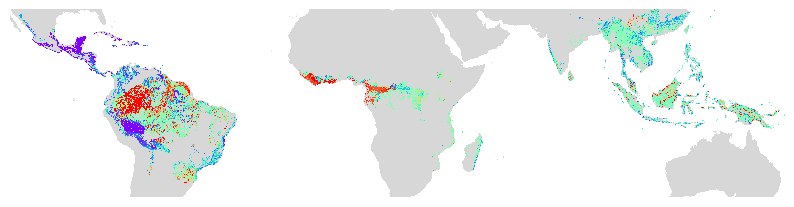

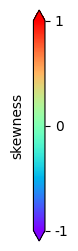

In [3]:
def make_fig(data_species, figsize=(10, 5), sl=None, interpolation="none", title_fig=None, is_hansen=False, cmap_='brg', save_title=None, min_cbar=1, add_side_plots=False):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    cmap_terra = ListedColormap(['white', '#D7D7D7FF'])
    img = terra[sl_tropics].squeeze()
    ax.imshow(img, cmap=cmap_terra)
    cmap_species = plt.get_cmap(cmap_)
    cmap_species.set_under('k', alpha=0)
    cmap_species.set_bad(alpha=0)
    d = data_species[sl].squeeze().copy()
    im = ax.imshow(d, cmap=cmap_species, interpolation=interpolation)
    min_cbar = -1
    max_species = 1
    im.set_clim(min_cbar, max_species)
    ax.set_axis_off()

make_fig(skew_map_tropics, cmap_='rainbow', sl=sl_tropics)
plt.savefig(f"../figures/Figure4/skewness_map.png", bbox_inches='tight')


# Fixing random state for reproducibility
rng = np.random.default_rng(seed=19680801)
fig = plt.figure(figsize=(2, 3))
ax = fig.gca()

rng = np.random.default_rng(seed=19680801)
data = rng.standard_normal((250, 250))

cax = ax.imshow(data, vmin=-1, vmax=1, cmap='rainbow')
cax.set_visible(False)

cbar = fig.colorbar(cax,
                    ticks=[-1, 0, 1],
                    format=mticker.FixedFormatter(['-1', '0', '1']),
                    extend='both'
                    )
ax.remove()
labels = cbar.ax.get_yticklabels()
cbar.ax.set_ylabel('skewness', rotation=90, labelpad=-32, va='bottom')
plt.savefig(f"../figures/Figure4/skewness_cbar.png", bbox_inches='tight')

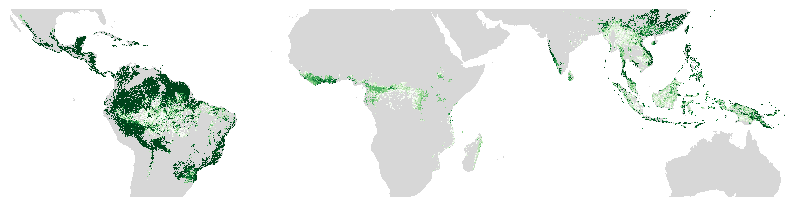

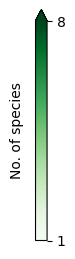

In [4]:
def make_fig(data_species, figsize=(10, 5), sl=None, interpolation="none", title_fig=None, is_hansen=False, cmap_='brg', save_title=None, min_cbar=1, add_side_plots=False):
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    cmap_terra = ListedColormap(['white', '#D7D7D7FF'])
    img = terra[sl].squeeze()
    ax.imshow(img, cmap=cmap_terra)
    cmap_species = plt.get_cmap(cmap_)
    cmap_species.set_under('k', alpha=0)
    cmap_species.set_bad(alpha=0)
    d = data_species[sl].squeeze().copy()
    if is_hansen:
        d[dense_vegetation[sl].squeeze() == 0] = 0
    im = ax.imshow(d, cmap=cmap_species, interpolation=interpolation)
    min_cbar = min_cbar if interpolation == 'none' else min_cbar - 1 +0.001
    max_species = 8
    im.set_clim(min_cbar, max_species)
    ax.set_axis_off()
    plt.savefig(f"../figures/Figure4/no_species_map.png", bbox_inches='tight')
    fig2 = plt.figure(figsize=(2, 3))
    ax2 = fig2.gca()
    cmap_species = cmap_
    im2 = ax2.imshow(data_species.squeeze(), cmap=cmap_species, interpolation=interpolation)
    min_cbar = 1
    max_species = 8
    im2.set_clim(min_cbar, max_species)
    im2.set_visible(False)
    cbar2 = fig.colorbar(im2,
                        ticks=[min_cbar, max_species],
                        format=mticker.FixedFormatter([f'{min_cbar}', f'{max_species}']),
                        extend='max'
                        )
    ax2.remove()
    cbar2.ax.set_ylabel('No. of species', rotation=90, labelpad=-30, va='bottom')
    plt.savefig(f"../figures/Figure4/no_species_cbar.png", bbox_inches='tight')

file_species = DATA_PATH + f"/outputs/species_above_threshold_1981_2010{version}.tif"
rio_species = rio.open(file_species, 'r')
data_allspecies = rio_species.read(1)
data_allspecies[dense_vegetation == 0] = 0
data_allspecies[~data_both_biomes] = 0
data_allspecies[np.isnan(Tcrit_map)] = 0
data_allspecies[np.isnan(skew_map_tropics)] = 0

make_fig(data_allspecies, sl=sl_tropics, cmap_="Greens", interpolation='none', is_hansen=True, add_side_plots=False)
